# <font color='navy'>Step 1 Problem Definition - Business Perspective:</font>

* In the real estate world, machine learning (ML) is a game-changer for predicting house selling prices. By analyzing vast amounts of data, ML models can uncover complex patterns and factors that influence price beyond just square footage and location.
* This translates to more accurate valuations, allowing realtors to:  advise sellers on competitive listing prices, attract serious buyers with realistic expectations, and close deals faster. Ultimately, ML helps businesses make data-driven decisions to optimize the entire selling process.
* Our goal here is to use past house sales data with input and output variables (Saleprice) to predict how much a house will be sold in the future.

# <font color='navy'>Step 2 Data Collection:</font>

* We get the data from Kaggle directory.
* Of course in real life, you will use SQL, access to databases at work, write SQL querries to obtain the data. * You will need to join tables, or even use multiple databases to get the data you need for the problem you aim to solve.

In [ ]:
import pandas as pd

# Using the direct link to the file

# Read the CSV file using Pandas (pd)
url = 'https://drive.google.com/file/d/1qGvJNZRryren302mAMjRs_PPNrO-l8Pr/view?usp=sharing'

# Extracting the file ID from the URL
file_id = url.split('/')[-2]

# Constructing the download link for the file
download_link = 'https://drive.google.com/uc?export=download&id=' + file_id

# Reading the CSV file from the provided link
data = pd.read_csv(download_link)


#READ BELOW COMMENT CAREFULLY
# Use the below code only if you reach download limit on G-Drive
#data = pd.read_csv('https://raw.githubusercontent.com/marineevy/datasets/main/housing_data.csv')

# Use the below code only if you cannot load the data using previous two methods
#data = pd.read_csv('/content/housing_data.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* Recall in the data collection step, we mentioned that We always need two datasets in predictive modeling: Training and Testing Data.
* The training dataset is used to build the model (i.e., computing the betas). The model learns patterns and relationships from this data to make future predictions.
* The testing dataset is used to evaluate the performance of the built model. In other words, the test dataset is our “pretend future” dataset. Because we will use our model on future observations to make predictions, we need to test how our model will perform on a dataset that has not seen before.
* Basically, we want to see if the model is good to be used for making future predictions through test dataset.

* So we have just one dataset, how we will go from one dataset two datasets.
* This is very simple: We will take the main dataset and randomly divide into training and testing sets.
* Generally, we use 70 percent for training and 30 percent for testing.
* Divising the main dataset can be done using a function.

In [ ]:
# Before I do train test split, I want to remove variables that are all na such as PoolQC	Fence.
# I also want to remove the ID variable

# Define a list to store the names of columns to be removed
col_names = []

# Iterate through each column in the DataFrame
for i in data.columns:
    # Check if more than 70% of the values in the column are NaN
    if data[i].isna().sum() / len(data) > 0.7:
        # Append the column name to the list of columns to be removed
        col_names.append(i)
        # Drop the column from the DataFrame
        data = data.drop(i, axis=1)

# Drop the 'Id' column from the DataFrame as it is not needed for analysis
data = data.drop('Id', axis=1)

# Print the names of the columns that were removed
col_names


['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
# split input and output variables

# Define the target variable 'y' as the 'SalePrice' column from the DataFrame
y = data['SalePrice'].copy()

# Define the feature variables 'X' by dropping the 'SalePrice' column from the DataFrame
X = data.drop('SalePrice', axis=1).copy()


In [ ]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import pandas and numpy libraries (used for data manipulation and numerical operations)
import pandas as pd
import numpy as np

# Split the dataset into training and testing sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.33 indicates that 33% of the data will be used for testing, and the remaining 67% will be used for training
# random_state=42 ensures reproducibility of the split (the same random state will produce the same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
X_train.head() # first x records

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
858,20,RL,60.0,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2009,WD,Normal
943,90,RH,82.0,7136,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2007,WD,Normal
534,120,RH,34.0,4058,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,6,2007,WD,Normal
934,80,RL,70.0,8163,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,3,2006,WD,Normal
1335,60,RL,NaN,10316,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,184,0,0,0,0,0,6,2008,WD,Normal


In [ ]:
y_train.head() # first x records

858     109500
943     145000
534     133000
934     143000
1335    235000
Name: SalePrice, dtype: int64

# <font color='navy'>Step 3 Data Processing</font>
* In real life, you will need to do all the steps as outlined in previous modules, particularly in the data preprocessing modeule.
* You will need to extract features (recall the movies dataset where we extracted the cast information, directors, writers)
* You will handle missing values outliers
* You will need to standardize/scale the numerical variables.
* You will convert categorical variables into numerical variables
* If you have text data like feedback comments you will need to process that data to creaste tf-idf/dtm etc.

## <font color='maroon'>Step 3.1 Data processing: data cleaning - identify and deal with missing data</font>



In [ ]:
for i in X_train.columns:
  if X_train[i].isna().sum() > 0:
    print(i)

LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [ ]:
# determine categorical input variables
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
# determine numerical input variables
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Import the nan constant from the math module
from math import nan

# Import the SimpleImputer class from scikit-learn's impute module
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object for imputing missing numerical values with the mean of the column
num_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# Create a SimpleImputer object for imputing missing categorical values with the most frequent value of the column
cat_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")


# Fit the numerical imputer on the training data for numerical columns
# This calculates the mean of each numerical column in the training set
num_imputer.fit(X_train[numerical_cols])

# Fit the categorical imputer on the training data for categorical columns
# This calculates the most frequent value of each categorical column in the training set
cat_imputer.fit(X_train[categorical_cols])

# Transform the numerical columns in the training data by replacing missing values with the calculated means
X_train[numerical_cols] = num_imputer.transform(X_train[numerical_cols])

# Transform the categorical columns in the training data by replacing missing values with the most frequent values
X_train[categorical_cols] = cat_imputer.transform(X_train[categorical_cols])


In [ ]:
for i in X_train.columns:
  if X_train[i].isna().sum() > 0:
    print(i)


## <font color='maroon'>Step 3.2 Data processing: create new features</font>

In [ ]:
X_train['Age'] = X_train['YrSold'] - X_train['YearBuilt']

## <font color='maroon'>Step 3.3 Data processing: scale data data</font>

In [ ]:
# Select the numerical columns (columns of type int64 and float64) from the training data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical columns
numerical_cols

# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object for standardizing numerical features
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the training data
# This calculates the mean and standard deviation for each numerical column in the training set
scaler.fit(X_train[numerical_cols])

# Transform the numerical columns in the training data by standardizing them
# This scales the numerical features so that they have a mean of 0 and a standard deviation of 1
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])


## <font color='maroon'>Step 3.4 Data processing: Encode categorical variables</font>
* Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.



In [ ]:
# Import the OneHotEncoder class from scikit-learn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns (columns of type object) from the training data
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
categorical_cols

# Initialize the OneHotEncoder to handle categorical variables
# 'handle_unknown='ignore'' will ignore categories that weren't in the training set
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the categorical variables in the training data
enc.fit(X_train[categorical_cols])

# Transform the categorical variables and store as a new DataFrame 'dummies'
# The transformed data is converted to an array and wrapped in a DataFrame for integration
# 'get_feature_names_out()' provides new column names indicating each unique category
dummies = pd.DataFrame(enc.transform(X_train[categorical_cols]).toarray(),
                       columns=enc.get_feature_names_out())

# Drop the original categorical columns from the training data to avoid redundancy
X_train.drop(categorical_cols, axis=1, inplace=True)

# Reset the index of the training data to ensure proper alignment when concatenating
X_train.reset_index(drop=True, inplace=True)

# Concatenate the original training data with the new 'dummies' DataFrame along columns (axis=1)
X_train = pd.concat([X_train, dummies], axis=1)

# Display the first two rows of the modified training data to verify changes
X_train.head(2)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.864802,-0.443124,-0.372168,-0.814149,-0.538037,-0.326153,-1.133482,-0.581175,-0.955582,-0.279427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.800697,0.593420,-0.320755,-0.074362,0.371255,-0.863995,-1.719060,1.798958,0.100191,-0.279427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# <font color='navy'>Step 4 EDA and Data Visualization:</font>
* We have covered descriptive statistics and data visualization techniques in the previous modules.
* Conduct some de scriptive statistics
* Develop hypotheses and test them
* Do some visualizations.
* Feel free to do some explaratory analysis.

# <font color='navy'>Step 5 - Model Building and Predicting Output Variable on Test Data </font>

## <font color='maroon'>Step 5.1 - Model Building and Predicting Output Variable on Test Data: Linear Regression </font>

In [ ]:
# Import the datasets and linear_model modules from scikit-learn
from sklearn import datasets
from sklearn import linear_model

# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the linear regression model using the training data
# The fit method is used to train the linear regression model with the training features (X_train) and target values (y_train)
regr.fit(X_train, y_train)


LinearRegression()

* Let's compute performance metrics for the training data to see how the model performs
* To do this we will need to make predictions for the training data as well.

In [ ]:
# Import the mean_squared_error and r2_score functions from scikit-learn's metrics module
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import the math module for mathematical operations
import math

# Make predictions on the training data using the trained linear regression model
pred_train = regr.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) between the actual and predicted values for the training data
rmse = math.sqrt(mean_squared_error(y_train, pred_train))

# Calculate the Coefficient of Determination (R^2 score) to measure the model's performance on the training data
r2 = r2_score(y_train, pred_train)

# Print the Root Mean Squared Error (RMSE) for the training data with 2 decimal places
print("Mean squared error: %.2f" % rmse)

# Print the Coefficient of Determination (R^2 score) for the training data with 2 decimal places
print("Coefficient of determination: %.2f" % r2)


Mean squared error: 17114.60
Coefficient of determination: 0.95


* Making predictions for test set and Performance calculation with test set
* Before we do this, the X_test dataset MUST GO THROUGH THE SAME DATA PROCESSING PIPELINE

In [ ]:
# Replacing missing values in the test data

# Select the numerical columns (columns of type int64 and float64) from the test data
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select the categorical columns (columns of type object) from the test data
categorical_cols = X_test.select_dtypes(include=['object']).columns.tolist()

# Transform the numerical columns in the test data by replacing missing values with the calculated means
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

# Transform the categorical columns in the test data by replacing missing values with the most frequent values
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

# Adding new features

# Create a new feature 'Age' by subtracting 'YearBuilt' from 'YrSold'
X_test['Age'] = X_test['YrSold'] - X_test['YearBuilt']

# Scaling numerical variables

# Select the updated numerical columns (after adding 'Age') from the test data
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Transform the numerical columns in the test data by standardizing them
# This scales the numerical features so that they have a mean of 0 and a standard deviation of 1
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Encoding categorical variables

# Select the updated categorical columns (columns of type object) from the test data
categorical_cols = X_test.select_dtypes(include=['object']).columns.tolist()

# Transform the categorical variables and store as a new DataFrame 'dummies'
# The transformed data is converted to an array and wrapped in a DataFrame for integration
# 'get_feature_names_out()' provides new column names indicating each unique category
dummies = pd.DataFrame(enc.transform(X_test[categorical_cols]).toarray(),
                       columns=enc.get_feature_names_out())

# Drop the original categorical columns from the test data to avoid redundancy
X_test.drop(categorical_cols, axis=1, inplace=True)

# Reset the index of the test data to ensure proper alignment when concatenating
X_test.reset_index(drop=True, inplace=True)

# Concatenate the original test data with the new 'dummies' DataFrame along columns (axis=1)
X_test = pd.concat([X_test, dummies], axis=1)

# Display the first two rows of the modified test data to verify changes
X_test.head(2)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.864802,3.373242,2.042153,-0.074362,-0.538037,-0.393384,-1.231079,0.049026,0.438299,-0.279427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.864802,-0.443124,0.113574,-0.074362,-0.538037,-0.796765,-1.719060,0.577944,-0.222649,-0.279427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Make predictions on the test data using the trained linear regression model
pred_test = regr.predict(X_test)

# Convert the array of predictions into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Reset the index of the actual target values (y_test) to ensure proper alignment with predictions
y_test.reset_index(drop=True, inplace=True)

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()


,preds,actual
0,227591.25,215000
1,112492.75,119200
2,193710.25,234000
3,252793.25,180000
4,245306.25,226000


In [ ]:
# Print the minimum value of the training target values (y_train)
print(min(y_train))

# Print the maximum value of the training target values (y_train)
print(max(y_train))


35311
755000


In [ ]:
# Drop rows from the predictions DataFrame where the predicted values ('preds') are less than 30,000
predictions.drop(predictions[predictions['preds'] < 30000].index, axis=0, inplace=True)

# Drop rows from the predictions DataFrame where the predicted values ('preds') are greater than 800,000
predictions.drop(predictions[predictions['preds'] > 800000].index, axis=0, inplace=True)


In [ ]:
# Calculate the Root Mean Squared Error (RMSE) between the filtered predicted and actual values
rmse = math.sqrt(mean_squared_error(predictions['preds'], predictions['actual']))

# Calculate the Coefficient of Determination (R^2 score) to measure the model's performance on the filtered data
r2 = r2_score(predictions['preds'], predictions['actual'])

# Print the Root Mean Squared Error (RMSE) with 2 decimal places
print("Mean squared error: %.2f" % rmse)

# Print the Coefficient of Determination (R^2 score) with 2 decimal places
print("Coefficient of determination: %.2f" % r2)


Mean squared error: 28198.70
Coefficient of determination: 0.87


**Let's Check the Linear Regression Assumption:**
1. Homoscedasticity: Homoscedasticity refers to the condition in which the variance of errors or residuals in a regression model is constant across all levels of the independent variable. This assumption ensures that the model's predictions are equally reliable for all values of the independent variable. Homoscedasticity means that the spread or scatter of errors in a data set is the same, no matter what the value of the independent variable is. This helps ensure that the predictions from a statistical model are consistently accurate.

<Axes: xlabel='None', ylabel='preds'>

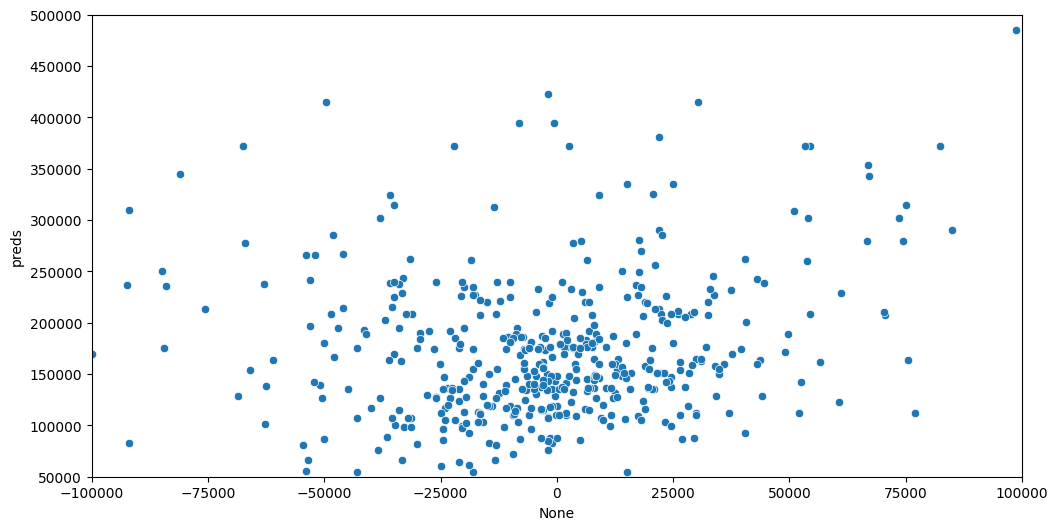

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of the predicted values against the actual values
fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size
ax = sns.scatterplot(x = predictions['preds'] - predictions['actual'], y = predictions['preds'])
#plots the error vs. predicted
limits = ax.set(xlim=(-100000, 100000), ylim=(50000, 500000)) #sets the limit for x and y axis
ax

**Let's check the normality assumption**
* A probability plot of residuals in linear regression shows whether the residuals (the differences between observed and predicted values) follow a normal distribution. If the points on the plot closely follow a straight line, it indicates that the residuals are normally distributed, which is an assumption for many statistical tests and models
* Deviations from this line suggest that the residuals may not be normally distributed, which could indicate potential problems with the model.

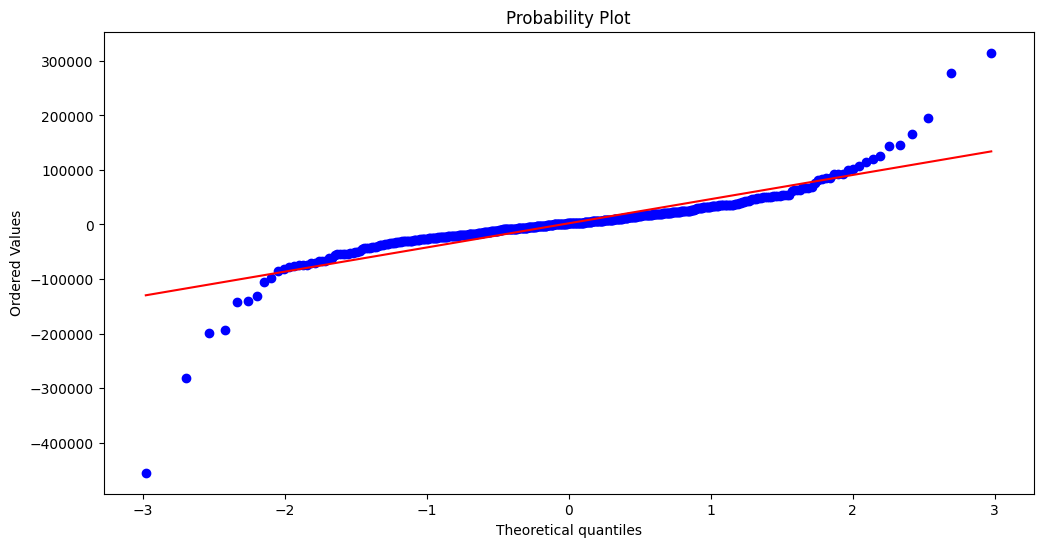

In [ ]:
from scipy import stats

fig, ax = plt.subplots(figsize=(12,6)) # Determines the figure size


_, (__, ___, r) = stats.probplot(predictions['actual'] - predictions['preds'], plot=ax, fit=True)
# generates the normality plot

## <font color='maroon'>Step 5.2 - Model Building - Decision Tree Algorithm </font>

In [ ]:
# Import the tree module from scikit-learn
from sklearn import tree

# Create a Decision Tree Regressor object (without specifying max_depth)
reg_tree = tree.DecisionTreeRegressor()  # tree.DecisionTreeRegressor(max_depth=20)

# Train the decision tree regressor using the training data
reg_tree.fit(X_train, y_train)

# Make predictions on the training data
pred_train = reg_tree.predict(X_train)

# Make predictions on the test data
pred_test = reg_tree.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for the training data
rmse_train = math.sqrt(mean_squared_error(pred_train, y_train))

# Calculate the Coefficient of Determination (R^2 score) for the training data
r2_train = r2_score(pred_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) for the test data
rmse_test = math.sqrt(mean_squared_error(pred_test, y_test))

# Calculate the Coefficient of Determination (R^2 score) for the test data
r2_test = r2_score(pred_test, y_test)

# Print the Root Mean Squared Error (RMSE) for the training data with 2 decimal places
print("Mean squared error train data: %.2f" % rmse_train)

# Print the Coefficient of Determination (R^2 score) for the training data with 2 decimal places
print("Coefficient of determination train data: %.2f" % r2_train)

# Print the Root Mean Squared Error (RMSE) for the test data with 2 decimal places
print("Mean squared error test data: %.2f" % rmse_test)

# Print the Coefficient of Determination (R^2 score) for the test data with 2 decimal places
print("Coefficient of determination test data: %.2f" % r2_test)


Mean squared error train data: 0.00
Coefficient of determination train data: 1.00
Mean squared error test data: 50362.34
Coefficient of determination test data: 0.63


In [ ]:
# Convert the array of predictions on the test data into a DataFrame for easier manipulation and visualization
predictions = pd.DataFrame(pred_test, columns=['preds'])

# Add the actual target values (y_test) to the predictions DataFrame
predictions['actual'] = y_test.values

# Display the first few rows of the predictions DataFrame to verify the actual values alongside the predicted values
predictions.head()


,preds,actual
0,167000.0,215000
1,135000.0,119200
2,192500.0,234000
3,320000.0,180000
4,235000.0,226000


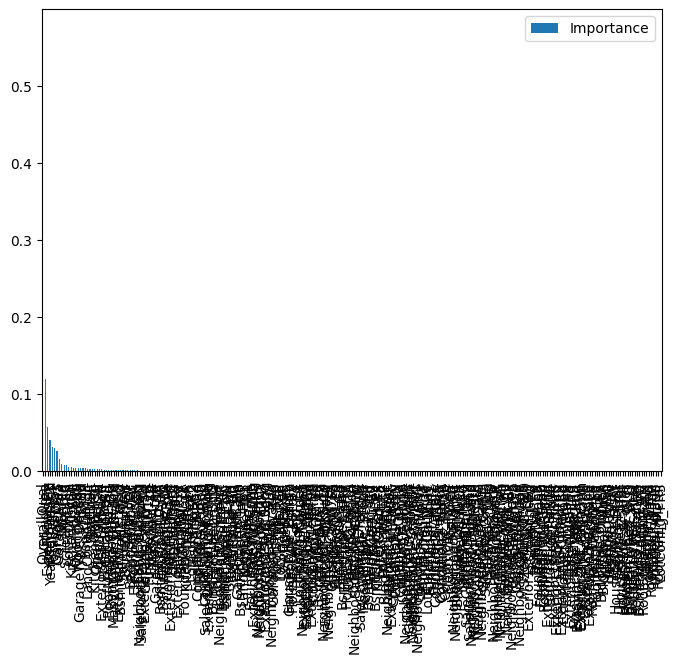

In [ ]:
# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Create a DataFrame for the feature importances calculated by the decision tree regressor
# The index of the DataFrame will be the feature names from the training data
# The column will be the importance scores
feat_importances = pd.DataFrame(reg_tree.feature_importances_, index=X_train.columns, columns=["Importance"])

# Sort the DataFrame by the importance scores in descending order
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances as a bar chart
# The plot will have a size of 8x6 inches
feat_importances.plot(kind='bar', figsize=(8,6))

# Display the plot
plt.show()


In [ ]:
# Create a DataFrame for the feature importances calculated by the decision tree regressor
# The DataFrame will have two columns: 'IMPORTANCE' and 'VARIABLE'
# 'IMPORTANCE' will contain the importance scores
# 'VARIABLE' will contain the corresponding feature names from the training data
var_importance = pd.DataFrame(reg_tree.feature_importances_, columns=['IMPORTANCE'])
var_importance['VARIABLE'] = X_train.columns

# Sort the DataFrame by the importance scores in descending order
var_importance.sort_values(by='IMPORTANCE', ascending=False, inplace=True)

# Display the DataFrame of variable importances
var_importance


,IMPORTANCE,VARIABLE
3,0.570861,OverallQual
15,0.119631,GrLivArea
155,0.057480,ExterQual_Ex
8,0.040441,BsmtFinSF1
6,0.031310,YearRemodAdd
...,...,...
119,0.000000,RoofMatl_ClyTile
41,0.000000,MSZoning_RM
52,0.000000,Utilities_AllPub
121,0.000000,RoofMatl_Metal


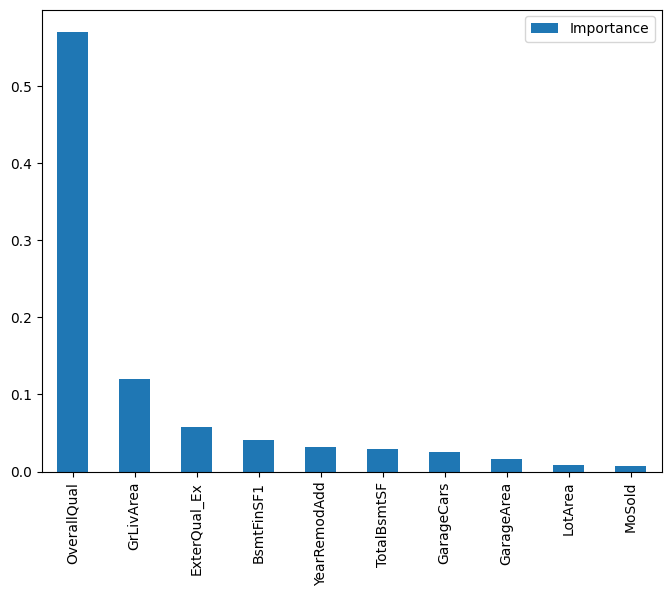

In [ ]:
# Plot the top 10 feature importances as a bar chart
# The plot will have a size of 8x6 inches
feat_importances[:10].plot(kind='bar', figsize=(8,6))

# Display the plot
plt.show()
